In [625]:
import random

import numpy
import numpy.matlib

L = 5
N = 10
S = 3

# Sample S unique elements from 1,...,N.
Omega = random.sample(range(N), S)
s = numpy.matlib.randn(S,1)

C_Omegat = numpy.zeros([N,S])
C_Omegat[Omega,:] = numpy.eye(S)

x = C_Omegat@s

import numpy as np

def make_connected_erdos_rendi(N=10, p=0.1):
  while True:
    S = np.array(np.random.rand(N, N) < p, dtype=float)
    S = np.triu(S, k=1)
    S = S + S.T
    # Make sure it is connected.
    L = np.diag(np.sum(S, 0)) - S
    eigvals = np.linalg.eig(L)[0]
    if sum(abs(eigvals) < 1e-6) == 1:
      return S

#h = np.random.randn(L, 1)
x = np.random.randn(N, 1)

GSO = make_connected_erdos_rendi(N=N)

# Directed cycle.
#GSO = np.diag(np.ones(N-1), 1)
#GSO[-1,0] = 1

eigvals, V = np.linalg.eig(GSO)
V = np.matrix(V)
U = np.linalg.inv(V)
Psi = np.vander(eigvals, L, increasing=True)
Psi = np.matrix(Psi)

# project
Omegaperp = np.setdiff1d(range(N), Omega, assume_unique=False)

import matplotlib.pyplot

U_Omega = U
U_Omega[:,Omegaperp] = 0 # ojo!
#matplotlib.pyplot.spy(U_Omega);

def linop_M_Omega(Z):
    r = np.zeros(N, dtype=np.csingle)
    for n in range(N):
        #print(U_Omega[n,:].shape, Z.shape, np.atleast_2d(Psi[n,:]).T.shape)
        r[n] = (U_Omega[n,:]@Z)@np.atleast_2d(Psi[n,:]).T
    return r

#b = linop_M_Omega(np.random.rand(N,L))

def linop_M_Omega_adj(z):
    R = np.zeros([N, L], dtype=np.csingle)
    for n in range(N):
        R += z[n]*(np.conjugate(np.atleast_2d(U_Omega[n,:]).T)@np.conjugate(Psi[n,:]))
    return R

#B = linop_M_Omega_adj(b)

A = U@C_Omegat

def linop_A(Z):
    r = np.zeros(N, dtype=np.csingle)
    for n in range(N):
        r[n] = A[n,:]@Z@np.atleast_2d(Psi[n,:]).T
    return r

def linop_A_adj(z):
    R = np.zeros([S, L], dtype=np.csingle)
    for n in range(N):
        R += z[n]*(np.conjugate(np.atleast_2d(A[n,:]).T)@np.conjugate(Psi[n,:]))
    return R

#(M^*_{i \Omega_i} M_{i \Omega_i} - Id
#(A^*_i A - Id)

Z = np.random.rand(N,L)
X = linop_M_Omega_adj(linop_M_Omega(Z))
Y = linop_A_adj(linop_A(C_Omegat.T@Z))

print('Support=', Omega, '\n')

print('X=\n',X,'\n')
print('Y=\n',Y,'\n')

assert(L>=S)
print('X-I=\n',X - np.block([C_Omegat, np.zeros([N,L-S])]),'\n')
print('Y-I=\n',Y - np.eye(N=S,M=L),'\n')

print(abs(np.linalg.norm(X - np.block([C_Omegat, np.zeros([N,L-S])]), ord=2)-np.linalg.norm(Y - np.eye(N=S,M=L), ord=2)))

Support= [9, 3, 4] 

X=
 [[   0.      +0.j    0.      +0.j    0.      +0.j    0.      +0.j
     0.      +0.j]
 [   0.      +0.j    0.      +0.j    0.      +0.j    0.      +0.j
     0.      +0.j]
 [   0.      +0.j    0.      +0.j    0.      +0.j    0.      +0.j
     0.      +0.j]
 [  36.897152+0.j  103.2827  +0.j  352.2444  +0.j 1058.3699  +0.j
  3395.1555  +0.j]
 [  55.69931 +0.j  174.11414 +0.j  530.8102  +0.j 1668.9607  +0.j
  5123.291   +0.j]
 [   0.      +0.j    0.      +0.j    0.      +0.j    0.      +0.j
     0.      +0.j]
 [   0.      +0.j    0.      +0.j    0.      +0.j    0.      +0.j
     0.      +0.j]
 [   0.      +0.j    0.      +0.j    0.      +0.j    0.      +0.j
     0.      +0.j]
 [   0.      +0.j    0.      +0.j    0.      +0.j    0.      +0.j
     0.      +0.j]
 [  52.887836+0.j  145.18542 +0.j  478.35086 +0.j 1412.1249  +0.j
  4515.9023  +0.j]] 

Y=
 [[  52.887836+0.j  145.18542 +0.j  478.35086 +0.j 1412.1249  +0.j
  4515.9023  +0.j]
 [  36.897152+0.j  103.2827  +0.j

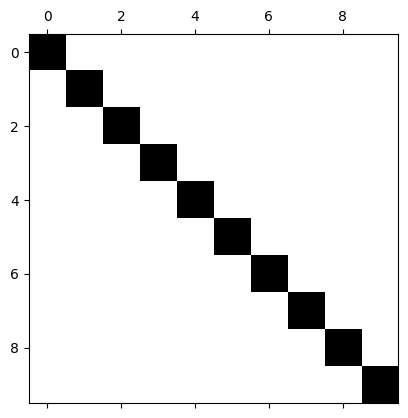

In [16]:
matplotlib.pyplot.spy(np.eye(10))